In [2]:
!pip install selectivesearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4349 sha256=26ce89e8be66f411e023103221c738bb1c8a6fa18079222017dec13bb5546d8e
  Stored in directory: /root/.cache/pip/wheels/83/0e/c9/4713ec9c1692e688f84fd3e80201018a02992949ca63697ba8
Successfully built selectivesearch


In [3]:
!mkdir /content/data
!wget -O /content/data/audrey01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg

--2022-07-03 18:06:17--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30102 (29K) [image/jpeg]
Saving to: ‘/content/data/audrey01.jpg’

/content/data/audre 100%[===================>]  29.40K  --.-KB/s    in 0s      

2022-07-03 18:06:18 (119 MB/s) - ‘/content/data/audrey01.jpg’ saved [30102/30102]



img shape: (450, 375, 3)


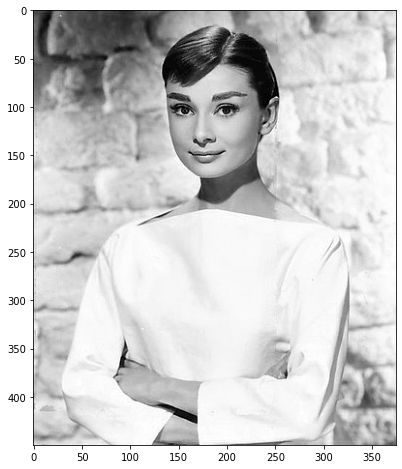

In [4]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

### 오드리헵번 이미지를 cv2로 로드하고 matplotlib으로 시각화 
img = cv2.imread('./data/audrey01.jpg')
# cvtColor : RGB로 바꿈
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
'''
default_dir = '/content/DLCV'
img = cv2.imread(os.path.join(default_dir, 'data/image/audrey01.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)'''
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

 ### selective_search에 사진을 넣고 region 탐색

In [5]:
import selectivesearch 

#selectivesearch.selective_search()는 이미지의 Region Proposal정보를 반환 
# selectivesearch.selective_search(img file, scale=오브젝트 추천 크기, min_size=오브젝트 최소 크기)
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)
# 튜플 생략, regions

print(type(regions), len(regions))
# <class 'list'> 41
# 41개의 공간

<class 'list'> 41


In [8]:
#selectivesearch.selective_search()함수: 이미지의 Region Proposal정보 반환 
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

# img_rgb : 이미지의 rgb값
# scale =100 : 알고리즘이 선택하는 오브젝트 크기를 조정하는 값->알고리즘 조정
# min_size=2000: 추천되는 값 중에 최소 이 값 이상은 선택하겠다(가로x세로값)->선택값 조정 
# =>  min_size값을 작게 잡으면 더 자세하게 그려지게 된다!
print(type(regions), len(regions))

<class 'list'> 41


In [9]:
# 반환된 regions 변수는 리스트 타입으로 세부 원소로 딕셔너리를 가지고 있다
regions

# rect는 x값, y값, width값, height값을 가지며 이 값이 Detected Object 후보를 나타내는 Bounding box
# size는 Bounding box의 크기
# labels는 해당 rect로 지정된 Bounding Box내에 있는 오브젝트들의 고유 ID
# 아래로 내려갈 수록 너비와 높이 값이 큰 Bounding box이며 하나의 Bounding box에 여러개의 오브젝트가 있을 확률이 커진다

[{'labels': [0.0], 'rect': (0, 0, 107, 167), 'size': 11166},
 {'labels': [1.0], 'rect': (15, 0, 129, 110), 'size': 8771},
 {'labels': [2.0], 'rect': (121, 0, 253, 133), 'size': 17442},
 {'labels': [3.0], 'rect': (134, 17, 73, 62), 'size': 2713},
 {'labels': [4.0], 'rect': (166, 23, 87, 176), 'size': 8639},
 {'labels': [5.0], 'rect': (136, 53, 88, 121), 'size': 4617},
 {'labels': [6.0], 'rect': (232, 79, 117, 147), 'size': 7701},
 {'labels': [7.0], 'rect': (50, 91, 133, 123), 'size': 7042},
 {'labels': [8.0], 'rect': (305, 97, 69, 283), 'size': 11373},
 {'labels': [9.0], 'rect': (0, 161, 70, 46), 'size': 2363},
 {'labels': [10.0], 'rect': (72, 171, 252, 222), 'size': 34467},
 {'labels': [11.0], 'rect': (0, 181, 118, 85), 'size': 5270},
 {'labels': [12.0], 'rect': (106, 210, 89, 101), 'size': 2868},
 {'labels': [13.0], 'rect': (302, 228, 66, 96), 'size': 2531},
 {'labels': [14.0], 'rect': (0, 253, 92, 134), 'size': 7207},
 {'labels': [15.0], 'rect': (153, 270, 173, 179), 'size': 10360},


### rect 정보만 뽑아서 출력하기

In [10]:
cand_rects = [cand['rect'] for cand in regions] # 하나의 예시를 보면, rect': (72, 171, 252, 222)
print(cand_rects)

[(0, 0, 107, 167), (15, 0, 129, 110), (121, 0, 253, 133), (134, 17, 73, 62), (166, 23, 87, 176), (136, 53, 88, 121), (232, 79, 117, 147), (50, 91, 133, 123), (305, 97, 69, 283), (0, 161, 70, 46), (72, 171, 252, 222), (0, 181, 118, 85), (106, 210, 89, 101), (302, 228, 66, 96), (0, 253, 92, 134), (153, 270, 173, 179), (0, 305, 47, 139), (104, 312, 80, 71), (84, 360, 91, 67), (0, 362, 171, 87), (297, 364, 77, 85), (0, 91, 183, 175), (136, 23, 117, 176), (72, 171, 254, 278), (134, 17, 119, 182), (302, 97, 72, 283), (121, 0, 253, 226), (0, 91, 183, 175), (0, 0, 144, 167), (0, 0, 253, 199), (0, 253, 92, 191), (0, 91, 183, 353), (0, 171, 326, 278), (0, 97, 374, 352), (84, 312, 100, 115), (0, 91, 184, 353), (0, 91, 195, 353), (0, 0, 374, 444), (0, 0, 374, 449), (0, 0, 374, 449), (0, 0, 374, 449)]


### bounding box를 시각화 하기



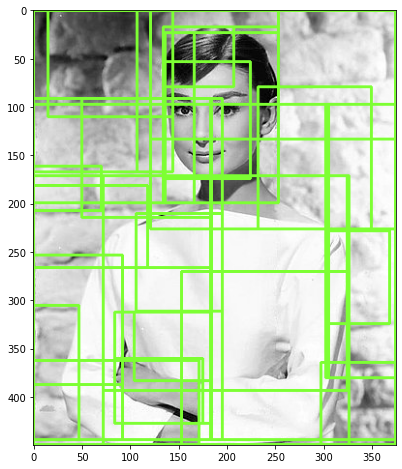

In [11]:
green_rgb = (125, 255, 51) #초록색 박스
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:    
    left = rect[0]
    top = rect[1]
    right = left + rect[2] #오른쪽=왼쪽+너비
    bottom = top + rect[3] #바닥=탑+높이
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    # opencv의 rectangle()을 이용하여 시각화
    # rectangle()은 이미지와 왼쪽 위 좌표, 오른쪽 아래 좌표, box컬러색, 두께 등을 인자로 입력하면 원본 이미지에 box를 그린다
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

### bounding box의 크기가 큰 후보만 추출

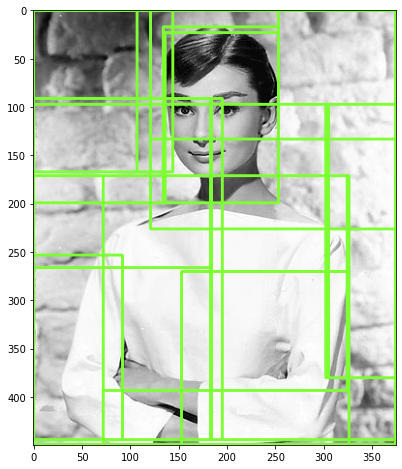

In [12]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000] 
# size가 10000이상인 값만 출력

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
    
    left = rect[0]
    top = rect[1]
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()